In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from ipywidgets import interact, interactive, fixed, interact_manual
plt.rcParams['figure.figsize'] = [16,16]
plt.rcParams.update({'font.size': 12})

## Vector Norms
A norm in vector space ( denoted by $ \lVert . \rVert $ ) $R^{m}$ is a mapping $R^{m} \rightarrow R$ such that <br> $\forall x,y \in R^{m}$, $ \forall \alpha \in R$
<ol>
    <li> $ \lVert x \rVert \geq 0 \;\;\;$ and $\; \lVert x \rVert =0 \;\;\; iff \;\; x=0 $</li>
    <li>$ \lVert \alpha x \rVert =$ |$\alpha$| $\lVert x \rVert $</li> 
    <li>$ \lVert  x+y \rVert \leq\lVert  x \rVert + \lVert  y \rVert \;\;$   Triangle Inequality </li>
</ol>
<br>
$p_{norms}$
$$ \lVert x \rVert _{p} = (x_{1}^{p} +...+ x_{m}^{p})^{\frac{1}{p}} $$
<br>
$1_{norm} \;$ $ \lVert x \rVert _{1} = |x_{1}| +...+ |x_{m}|$ <br>
$2_{norm} \;$ $ \lVert x \rVert _{2} = (x_{1}^2 +...+ x_{m}^2)^{\frac{1}{2}}$ <br>
$\infty_{norm} \;$ $ \lVert x \rVert _{\infty} = max(x_{1},...,x_{m})$ <br>

The norms are bounded <br>
$$ \lVert x \rVert_{\infty} \leq \lVert x \rVert_{2} \leq \lVert x \rVert_{1} \leq m \lVert x \rVert_{\infty} $$ <br>
This means that if 1 norm converages, all norms should convearge

## Ploting the Vector Norms
in order to plot the vector norms in $ R^2 $ We will implement this basic procedure: 
<br>
We know that  $$ \lVert x \rVert _{p} \in R^2 = (x_{1}^{p} + x_{2}^{p})^{\frac{1}{p}} = c \in R^1 \in [0,\inf) $$
In this case we wan to stay inside the unitary circle this means that $ c = 1 $, just keep in mind that c can be any other number insde $[0, \inf)$ and that the larger c, the bigger the "circle: we will generate.
$$  (x_{1}^{p} + x_{2}^{p})^{\frac{1}{p}} = 1 $$
Therefore
$$  (x_{1}^{p} + x_{2}^{p}) = 1^p $$
<br>
$$   x_{2}^{p} = 1^p - x_{1}^{p} $$
Keep in mind that $ 1^p = 1$
$$   x_{2} = (1 - x_{1}^{p})^{\frac{1}{p}}$$
A mor general function (that woul represent all C's) looks like this:
$$   x_{2} = (c^p- x_{1}^{p})^{\frac{1}{p}}$$
<br>
With this function we are now capable of visulizing the p-norm in a 2 dimensional representation.


In [12]:
def plot_pnorm(p=1/np.pi,c=1):
    n = 51 # numbper of points in vectors
    ### We will generate the 4 quadrants of the unitary circle ###
    
    ## First Quadrant  ##
    q1_x=np.linspace(0,c,n)
    ## Second Quadrant  ## 
    q2_x=np.linspace(0,-c,n)
    ## Third Quadrant  ## 
    q3_x=np.linspace(0,-c,n)
    ## Forth Quadrant  ##
    q4_x=np.linspace(0,c,n)
    
    fig = plt.figure(figsize=(20,20))

    ax1 = fig.add_subplot(443)
  
    #Norm p in the first quadrant 
    x21 = get_x2(q1_x,c,p)
    ax1.plot(q1_x,x21,label="1q")
 
    #### This are the quadrants wheere x1 is negative keep that in mind ####
    #Norm p in the second quadrant 
    if p  % 2 == 0:
        x22 = get_x2(q2_x,c,p)
    else:
        x22 = get_x2_odd(q2_x,c,p)
     
    ax1.plot(q2_x,x22,label="2q")
    
    #Norm p in the third quadrant 
    if p  % 2 == 0:
        x23 = -get_x2(q3_x,c,p) 
    else:
        x23 = -get_x2_odd(q3_x,c,p)
    
        
    ax1.plot(q3_x,x23,label="3q")
    
     #### end of section where  the quadrants wheere x1 is negative keep that in mind ####
    
  
    #Norm p in the forth quadrant 
    x24 =-get_x2(q4_x,c,p)
    ax1.plot(q4_x,x24,label="4q")
    ax1.legend(loc="upper left")
    ax1.set_title(f"{p} norm ")
    ax1.grid()
    ax1.set_xlim(-1*c -1,c+1)
    ax1.set_ylim(-1*c-1,c+1)
    ax1.set_xlabel(f"x1")
    ax1.set_ylabel(f"x2")


    plt.show()
    

def get_x2(x1,c,p):
    if p!=1:
        return ((c)**p-(x1)**p)**(1/p)
    else:
        return np.abs(c)-np.abs(x1)
    

def get_x2_odd(x1,c,p):
    if p>1:
        if (round(p,0) - p) == 0:
            return ((c)**p+(x1)**p)**(1/p)
        else:
             return ((c)**p-(-1*x1)**p)**(1/p)
            
    elif p<1:
        return ((c)**p-(-1*x1)**p)**(1/p)
        
    elif p==1:
        return np.abs(c)-np.abs(x1)
         
  
def pnorm(x,y,p):
    if p != 1:
        return ((x**p-y**p)**(1/p))
    else:
        return np.abs(x)+np.abs(y)
 

    




In [13]:

interact(plot_pnorm,p=(0.1,10,0.1),c=(1,10,1))

interactive(children=(FloatSlider(value=0.3183098861837907, description='p', max=10.0, min=0.1), IntSlider(val…

<function __main__.plot_pnorm(p=0.3183098861837907, c=1)>

# Native Code:
This is how I first desinged this program

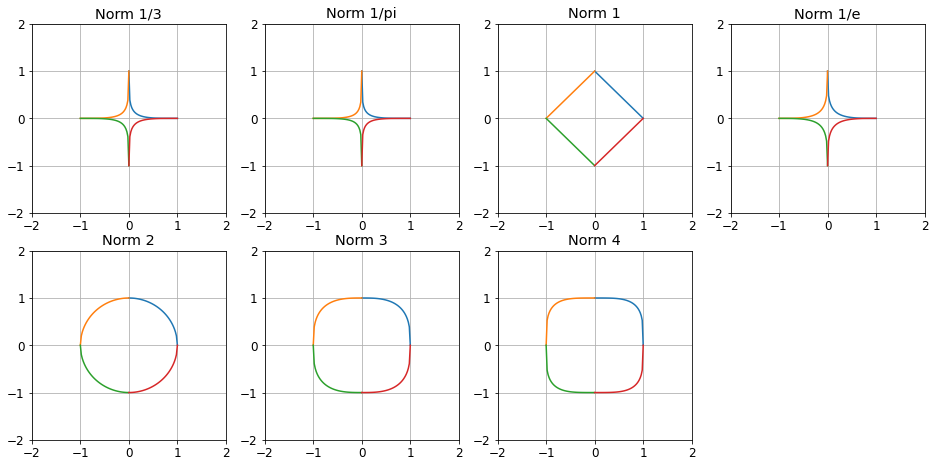

In [11]:
fig = plt.figure()

ax1 = fig.add_subplot(441)


####################### NORM 1/3 In canonical basis #######################
n1_q1 =(1-(q1_x)**(1/3))**(3)
ax1.plot(q1_x,n1_q1)

#Norm 1 in the second quadrant 
n1_q2 =(1-(q1_x)**(1/3))**(3)
ax1.plot(q2_x,n1_q2)

#Norm 1 in the third quadrant 
n1_q3 =(1-(q1_x)**(1/3))**(3)
ax1.plot(q3_x,-n1_q3)

#Norm 1 in the forth quadrant 
n1_q4 =(1-(q1_x)**(1/3))**(3)
ax1.plot(q4_x,-n1_q4)

ax1.set_title("Norm 1/3")
ax1.grid()
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)

####################### NORM 1/pi In canonical basis #######################

ax2 = fig.add_subplot(442)
e=1/np.pi
#Norm 1 in the first quadrant 
n1_q1 =(1-(q1_x)**(e))**(1/e)
ax2.plot(q1_x,n1_q1)

#Norm 1 in the second quadrant 
n1_q2 =(1-(q1_x)**(e))**(1/e)
ax2.plot(q2_x,n1_q2)

#Norm 1 in the third quadrant 
n1_q3 =(1-(q1_x)**(e))**(1/e)
ax2.plot(q3_x,-n1_q3)

#Norm 1 in the forth quadrant 
n1_q4 =(1-(q1_x)**(e))**(1/e)
ax2.plot(q4_x,-n1_q4)

ax2.set_title("Norm 1/pi")
ax2.grid()
ax2.set_xlim(-2,2)
ax2.set_ylim(-2,2)

####################### NORM 1 In canonical basis #######################

ax3 = fig.add_subplot(443)

#Norm 1 in the first quadrant 
n1_q1 =1-q1_x
ax3.plot(q1_x,n1_q1)

#Norm 1 in the second quadrant 
n1_q2 =q2_x+1
ax3.plot(q2_x,n1_q2)

#Norm 1 in the third quadrant 
n1_q3 =q3_x+1
ax3.plot(q3_x,-n1_q3)

#Norm 1 in the forth quadrant 
n1_q4 = 1-q1_x
ax3.plot(q4_x,-n1_q4)

ax3.set_title("Norm 1")
ax3.grid()
ax3.set_xlim(-2,2)
ax3.set_ylim(-2,2)

####################### NORM 1/e In canonical basis #######################

ax4 = fig.add_subplot(444)
e=1/np.e
#Norm 1 in the first quadrant 
n1_q1 =(1-(q1_x)**(e))**(1/e)
ax4.plot(q1_x,n1_q1)

#Norm 1 in the second quadrant 
n1_q2 =(1-(q1_x)**(e))**(1/e)
ax4.plot(q2_x,n1_q2)

#Norm 1 in the third quadrant 
n1_q3 =(1-(q1_x)**(e))**(1/e)
ax4.plot(q3_x,-n1_q3)

#Norm 1 in the forth quadrant 
n1_q4 =(1-(q1_x)**(e))**(1/e)
ax4.plot(q4_x,-n1_q4)

ax4.set_title("Norm 1/e")
ax4.grid()
ax4.set_xlim(-2,2)
ax4.set_ylim(-2,2)

####################### NORM 2 In canonical basis #######################

ax5 = fig.add_subplot(445)

#Norm 2 in the first quadrant 
n2_q1 =np.sqrt(1-q1_x**2)
ax5.plot(q1_x,n2_q1)

#Norm 2 in the second quadrant 
n2_q2 =np.sqrt(1-q1_x**2)
ax5.plot(q2_x,n2_q2)

#Norm 2 in the third quadrant 
n2_q3 =np.sqrt(1-q3_x**2)
ax5.plot(q3_x,-n2_q3)

#Norm 2 in the forth quadrant 
n2_q4 =np.sqrt(1-q4_x**2)
ax5.plot(q4_x,-n2_q4)

ax5.set_title("Norm 2")
ax5.grid()
ax5.set_xlim(-2,2)
ax5.set_ylim(-2,2)

####################### NORM 3 In canonical basis #######################

ax6 = fig.add_subplot(446)

#Norm 3 in the first quadrant 
n3_q1 =(1-(q1_x)**3)**(1/3)
ax6.plot(q1_x,n3_q1)

#Norm 3 in the second quadrant 
n3_q2 =(1+(q2_x)**3)**(1/3)
ax6.plot(q2_x,n3_q2)

#Norm 3 in the third quadrant 
n3_q3 =(1+(q3_x)**3)**(1/3)
ax6.plot(q3_x,-n3_q3)

#Norm 3 in the forth quadrant 
n3_q4 =(1-q4_x**3)**(1/3)
ax6.plot(q4_x,-n3_q4)

ax6.set_title("Norm 3")
ax6.grid()
ax6.set_xlim(-2,2)
ax6.set_ylim(-2,2)

####################### NORM 4 In canonical basis #######################

ax7 = fig.add_subplot(447)

#Norm 4 in the first quadrant 
n3_q1 =(1-(q1_x)**4)**(1/4)
ax7.plot(q1_x,n3_q1)

#Norm 4 in the second quadrant 
n3_q2 =(1-(q2_x)**4)**(1/4)
ax7.plot(q2_x,n3_q2)

#Norm 4 in the third quadrant 
n3_q3 =(1-(q3_x)**4)**(1/4)
ax7.plot(q3_x,-n3_q3)

#Norm 4 in the forth quadrant 
n3_q4 =(1-q4_x**4)**(1/4)
ax7.plot(q4_x,-n3_q4)

ax7.set_title("Norm 4")
ax7.grid()
ax7.set_xlim(-2,2)
ax7.set_ylim(-2,2)




plt.show()